# Albumentations Tutorial - PyTorch

```albumentations``` library can be used for different tasks, viz., classification, segmentation and object detection.

Pros of ```albumentations```:
- it is faster than torchvision on every benchmark
- can be used for tasks such as segmentation and object detection - much harder to do that in ```torchvision```

- [Albumentations documentation]
- [GitHub code](https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/Basics/albumentations_tutorial)

In [1]:
# Specify GPU to be used-
%env CUDA_DEVICE_ORDER = PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES = 0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [2]:
import cv2, os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

C:\Users\arjun\anaconda3\envs\torch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(f"torch version: {torch.__version__}")

torch version: 1.12.1


In [4]:
# Check if there are multiple devices (i.e., GPU cards)-
print(f"Number of GPU(s) available = {torch.cuda.device_count()}")

# Which GPU Is The Current GPU?
# print(f"current GPU: {torch.cuda.current_device()}")

# Get the name of the current GPU-
# print(f"Current GPU name: {torch.cuda.get_device_name(torch.cuda.current_device())}")

# Is PyTorch using a GPU?
# print(f"Is PyTorch using a GPU? {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"Current GPU name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("PyTorch does not have access to GPU")

Number of GPU(s) available = 1
Current GPU: 0
Current GPU name: NVIDIA GeForce RTX 3080 Laptop GPU


In [5]:
# Device configuration-
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Available device is {device}')

Available device is cuda


In [6]:
image = Image.open("../../Downloads/images/Abyssinian_100.jpg")

In [7]:
image.size

(394, 500)

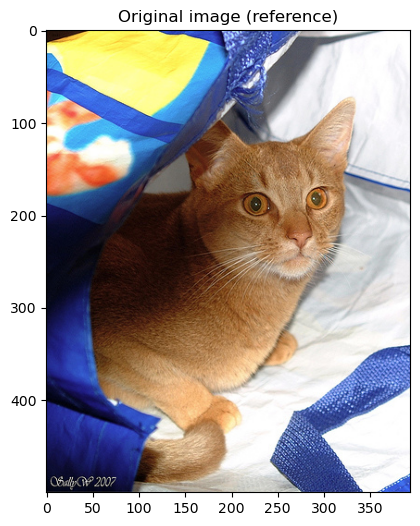

In [22]:
plt.figure(figsize = (7, 6))
plt.imshow(image)
plt.title("Original image (reference)")
plt.show()

### Example: _Classification_ task

In [20]:
# The transforms are defined as-
transforms = A.Compose(
    [
        A.Resize(width = 200, height = 200),
        A.RandomCrop(width = 128, height = 128),
        # This transform will be applied in 80% of cases-
        A.Rotate(limit = 40, p = 0.8, border_mode = cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p = 0.5),
        A.VerticalFlip(p = 0.1),
        A.RGBShift(
            r_shift_limit = 25, g_shift_limit = 25, b_shift_limit = 25, p = 0.8
        ),
        # One of these transforms will be chosen with some probability-
        A.OneOf(
            [
                A.Blur(blur_limit = 3, p = 0.5),
                A.ColorJitter(p = 0.5)
            ], p = 1.0
            # 100% of the cases, one of these will be chosen with 50% probability
        )
    ]
)
# The transforms are applied sequentially.

In [24]:
# Python3 list for images-
img_list = [image]
image = np.array(image)

In [25]:
for i in range(15):
    # 'augmentations' is a dict-
    augmentations = transforms(image = image)
    augmented_img = augmentations['image']
    img_list.append(augmented_img)

In [26]:
len(img_list)

16

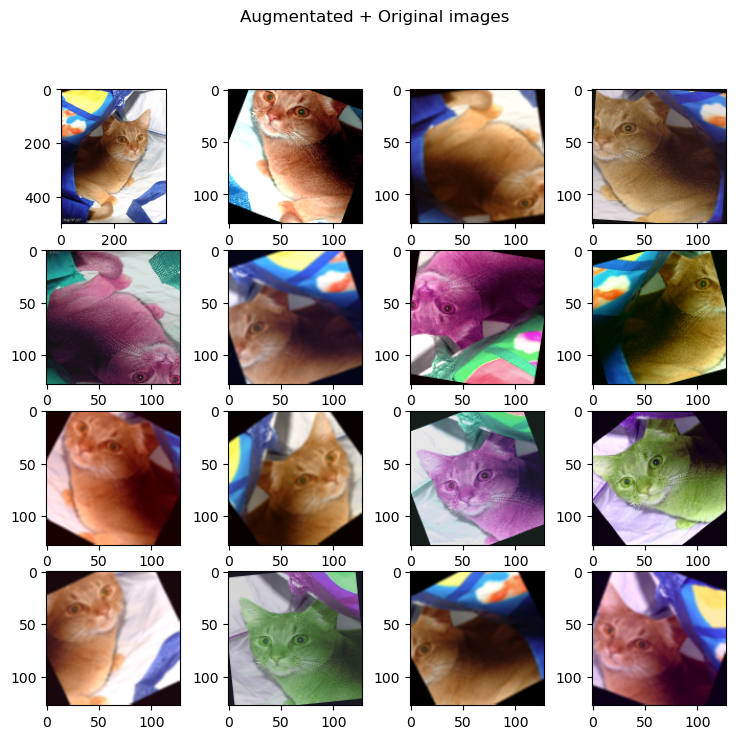

In [27]:
# Visualize image with augmentations-
plt.figure(figsize = (9, 8))
for i in range(16):
    # x rows & y columns-
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_list[i])
    
plt.suptitle("Augmentated + Original images")
plt.show()

### Example: _Segmentation_ task

In [28]:
# Read in an image and its corresponding mask-
img = Image.open("../../Downloads/elon.jpeg")
img_mask = Image.open("../../Downloads/elon_mask.jpeg")

In [29]:
# Input an additional second mask-
img_mask2 = Image.open("../../Downloads/elon_mask2.jpeg")

In [30]:
# Sanity check-
img.size, img_mask.size

((1797, 1350), (1790, 1350))

In [31]:
img.size, img_mask.size, img_mask2.size

((1797, 1350), (1790, 1350), (991, 750))

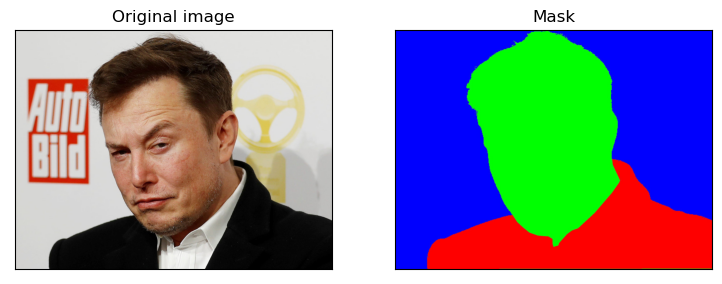

In [16]:
f = plt.figure(figsize = (9, 8))
f.add_subplot(1, 2, 1)

# get current axes-
ax = plt.gca()

# hide x-axis-
ax.get_xaxis().set_visible(False)

# hide y-axis-
ax.get_yaxis().set_visible(False)

plt.imshow(img)
plt.title("Original image")

f.add_subplot(1, 2, 2)

# get current axes-
ax = plt.gca()

# hide x-axis-
ax.get_xaxis().set_visible(False)

# hide y-axis-
ax.get_yaxis().set_visible(False)

plt.imshow(img_mask)
plt.title("Mask")

# plt.suptitle("Image Segmentation example")
# plt.show(block = True)
plt.show()

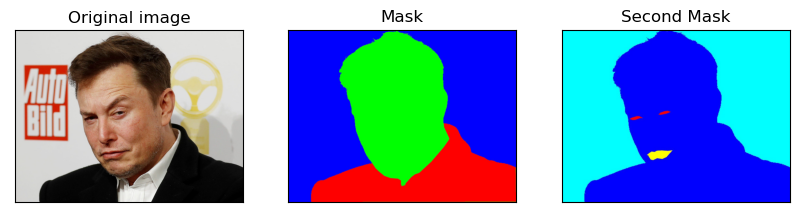

In [33]:
f = plt.figure(figsize = (10, 8))

f.add_subplot(1, 3, 1)

# get current axes-
ax = plt.gca()

# hide x-axis-
ax.get_xaxis().set_visible(False)

# hide y-axis-
ax.get_yaxis().set_visible(False)

plt.imshow(img)
plt.title("Original image")

f.add_subplot(1, 3, 2)

# get current axes-
ax = plt.gca()

# hide x-axis-
ax.get_xaxis().set_visible(False)

# hide y-axis-
ax.get_yaxis().set_visible(False)

plt.imshow(img_mask)
plt.title("Mask")

f.add_subplot(1, 3, 3)

# get current axes-
ax = plt.gca()

# hide x-axis-
ax.get_xaxis().set_visible(False)

# hide y-axis-
ax.get_yaxis().set_visible(False)

plt.imshow(img_mask2)
plt.title("Second Mask")

# plt.suptitle("Image Segmentation example")
# plt.show(block = True)
plt.show()

In [44]:
# Python3 list for images-
img_list = [img]

# Convert to np arrays-
img_mask = np.array(img_mask)

# Second mask (if any)-
img_mask2 = np.asarray(img_mask2)
img = np.array(img)

In [45]:
img.shape, img_mask.shape, img_mask2.shape

((1350, 1797, 3), (1350, 1790, 3), (750, 991, 3))

In [39]:
# For a single mask-
for i in range(15):
    # 'augmentations' is a dict-
    augmentations = transforms(image = img, mask = img_mask)
    augmented_img = augmentations['image']
    augmentated_mask = augmentations['mask']
    img_list.append(augmented_img)
    img_list.append(augmentated_mask)

In [46]:
# For two masks-
for i in range(15):
    # 'augmentations' is a dict-
    augmentations = transforms(image = img, masks = [img_mask, img_mask2])
    augmented_img = augmentations['image']
    augmented_masks = augmentations['masks']
    img_list.append(augmented_img)
    img_list.append(augmented_masks[0])
    img_list.append(augmented_masks[1])

In [49]:
len(img_list)

46

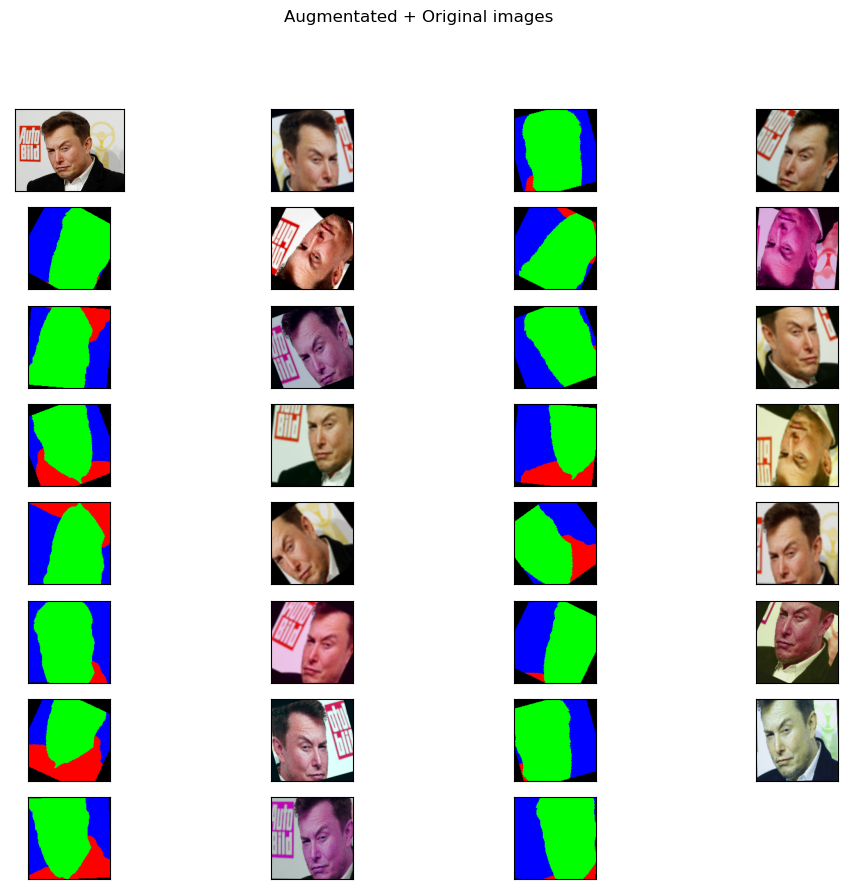

In [25]:
# Visualize image with augmentations- one mask
plt.figure(figsize = (12, 10))
for i in range(31):
    # x rows & y columns-
    plt.subplot(8, 4, i + 1)
    plt.imshow(img_list[i])
    
    # get current axes-
    ax = plt.gca()
    # hide x-axis-
    ax.get_xaxis().set_visible(False)
    # hide y-axis-
    ax.get_yaxis().set_visible(False)
    
plt.suptitle("Augmentated + Original images")
plt.show()

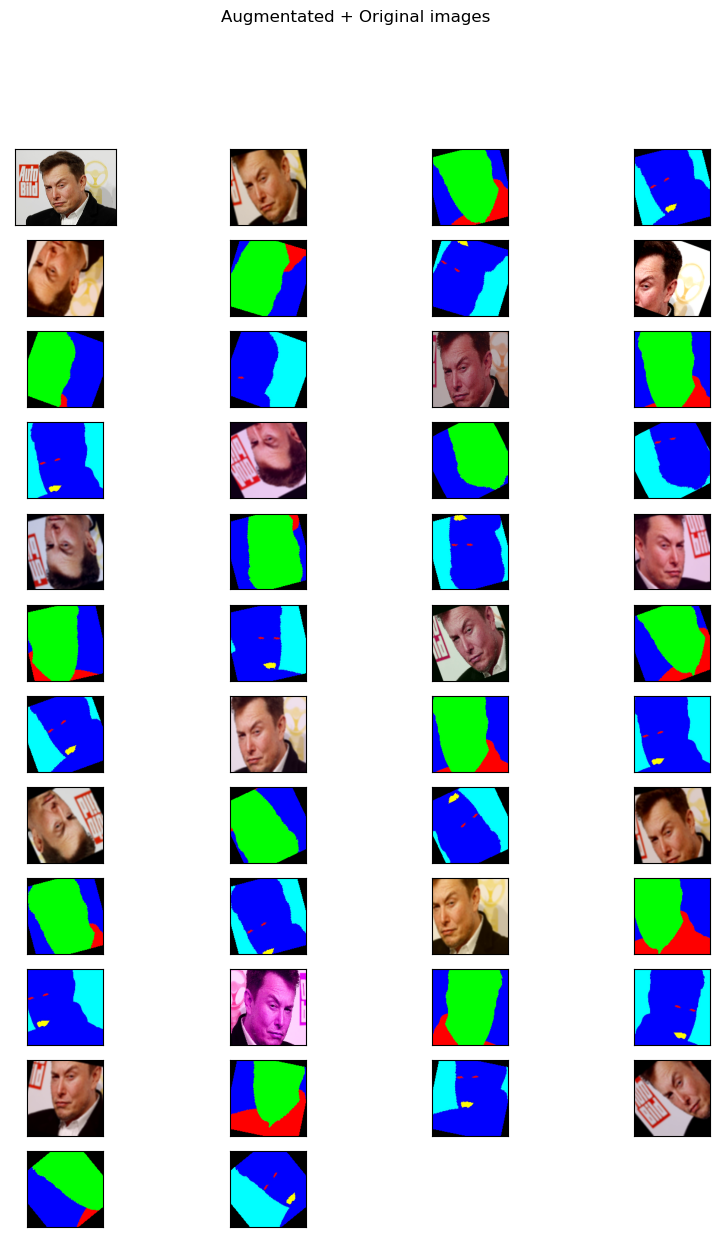

In [52]:
# Visualize image with augmentations- two masks
plt.figure(figsize = (10, 14))
for i in range(46):
    # x rows & y columns-
    plt.subplot(12, 4, i + 1)
    plt.imshow(img_list[i])
    
    # get current axes-
    ax = plt.gca()
    # hide x-axis-
    ax.get_xaxis().set_visible(False)
    # hide y-axis-
    ax.get_yaxis().set_visible(False)
    
plt.suptitle("Augmentated + Original images")
plt.show()

### Object Detection

In [46]:
# Read in images with OpenCV2-
img = cv2.imread("../../Downloads/cat.jpg")

In [47]:
img.shape

(480, 640, 3)

In [48]:
# OpenCV2 loads images as BGR instead of RGB (for some historical reasons)-
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [49]:
# Bounding box (manual inputs used)-
bounding_box = [
    [13, 170, 224, 410]
]
# A list of lists, where each list is a bounding box. Important to know
# format of bounding boxes for object detection.

#### Different formats for _bounding boxes_

- Pascal VOC: $x_{min}, y_{min}, x_{max}, y_{max}$. $x_{min}$ and $y_{min}$ are coordinates of the top-left corner of the bounding box, while $x_{max}$ and $y_{max}$ are coordinates of bottom-right corner of the bounding box.

- COCO: $x_{min}, y_{min}, width, height$. $x_{min}, y_{min}$ are coordinates of the top-left corner along with the width and height of the bounding box.

- YOLO: $x_{center}, y_{center}, width, height$. $x_{center}$ and $y_{center}$ are the normalized coordinates of the center of the bounding box. $width$ and $height$ are normalized as well.


[Albumentations - bounding boxes augmentation reference](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/)

In [50]:
len(bounding_box)

1

In [43]:
# The transforms are defined as-
transform = A.Compose(
    [
        A.Resize(width = 1920, height = 1080),
        A.RandomCrop(width = 1280, height = 720),
        # This transform will be applied in 90% of cases-
        A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p = 0.5),
        A.VerticalFlip(p = 0.1),
        A.RGBShift(r_shift_limit = 25, g_shift_limit = 25, b_shift_limit = 25, p = 0.9),
        # One of these transforms will be chosen with some probability-
        A.OneOf([
            A.Blur(blur_limit = 3, p = 0.5),
            A.ColorJitter(p = 0.5),
        ], p = 1.0),
        # 100% of the cases, one of these will be chosen with 50% probability
    ], bbox_params = A.BboxParams(
        format = "pascal_voc", min_area = 2048,
        min_visibility = 0.3, label_fields = []
    )
    # 'yolo', 'coco'
    # min_area = the bbox shown in the image should have at least 2048 pixels in area.
    # min_visibility = bbox should have some area wrt the entire image. It should
    # cover some % of the output image. In this case, its 30% of the entire image.
)
# The transforms are applied sequentially.

In [51]:
# Python list to contain augmented data-
img_list = [img]

In [52]:
# Python list to contain augmented bounding box-
saved_bboxes = [bounding_box[0]]

In [53]:
# For a single mask-
for i in range(15):
    # 'augmentations' is a dict-
    augmentations = transforms(image = img, bboxes = bounding_box)
    augmented_img = augmentations['image']
    
    # The bbox is dropped for the image-
    if len(augmentations['bboxes']) == 0:
        continue
    
    img_list.append(augmented_img)
    # This is returned as a list of list. For now, just the list is extracted.
    # And so, the 0th index is chosen-
    saved_bboxes.append(augmentations['bboxes'][0])
    

In [54]:
len(img_list)

12

In [21]:
def visualize_bbox(img, bbox, class_name, color = (255, 0, 0), thickness = 5):
    """
    Visualizes a single bounding box on the image.
    https://albumentations.ai/docs/examples/example_bboxes/
    """
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img


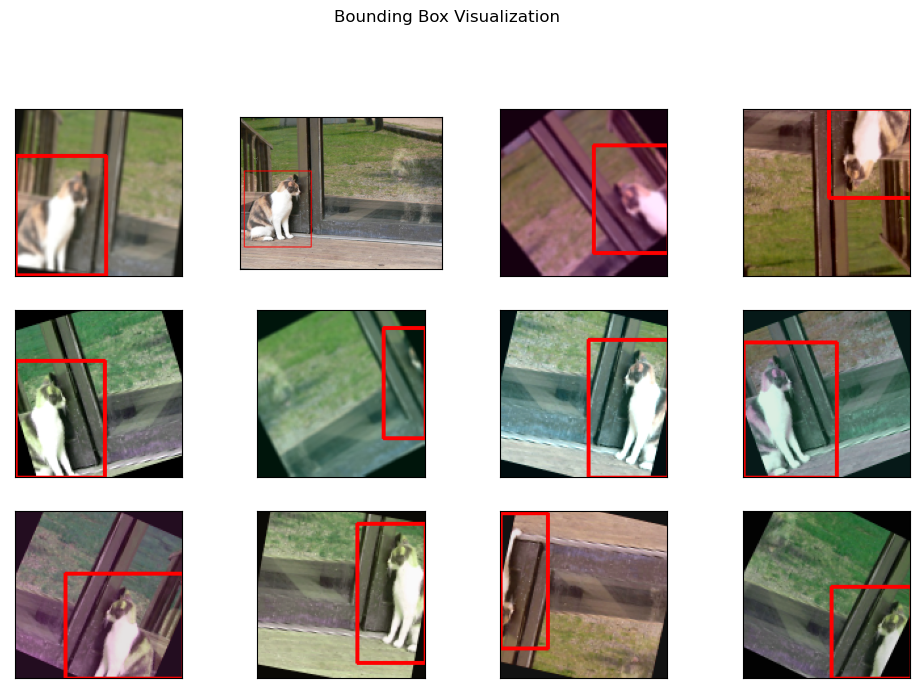

In [55]:
# Visualize image with augmentations- one mask
plt.figure(figsize = (12, 10))
for i in range(12):
    # x rows & y columns-
    plt.subplot(4, 4, i + 1)
    # plt.imshow(img_list[i])
    img = visualize_bbox(
        img_list[i - 1], saved_bboxes[i - 1],
        class_name = "Cat", thickness = 2
    )
    plt.imshow(img)
    
    # get current axes-
    ax = plt.gca()
    # hide x-axis-
    ax.get_xaxis().set_visible(False)
    # hide y-axis-
    ax.get_yaxis().set_visible(False)
    
plt.suptitle("Bounding Box Visualization")
plt.show()

#### Observation

- When performing rotation(s), the bounding box(es) become inflated. That is a common issue and not an error. It is expected.

- Using random cropping might result in samples where (in this example), the object = cat is no longer present in the image, maybe because that region was randomly cropped out. Consequently, ```min_area``` and ```min_visibility``` arguments are added to ```bbox_params```.

### A complete _classification_ example

In [6]:
transform = A.Compose(
    [
        A.Resize(width = 1920, height = 1080),
        A.RandomCrop(width = 1280, height = 720),
        A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p = 0.5),
        A.VerticalFlip(p = 0.1),
        A.RGBShift(r_shift_limit = 25, g_shift_limit = 25, b_shift_limit = 25, p = 0.9),
        A.OneOf([
            A.Blur(blur_limit = 3, p = 0.5),
            A.ColorJitter(p = 0.5),
        ], p = 1.0),
        A.Normalize(
            mean = [0, 0, 0],
            std = [1, 1, 1],
            max_pixel_value = 255,
        ),
        # This is not dividing by 255, which it does in PyTorch-
        ToTensorV2(),
    ]
)

### Classification task

- It's assumed that the ```root_dir```, has sub-directories where the label of the sub-directory serves as the target for all of the images contained within.

- In my example, I don't have sub-directories and rather have just one ```root_dir``` with all images belonging to just one target/label. Uncomment the code (below) to achieve point 1 above.

In [7]:
class ImageFolder(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform = None):
        super(ImageFolder, self).__init__()
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = os.listdir(root_dir)

        for index, name in enumerate(self.class_names):
            # files = os.listdir(os.path.join(root_dir, name))
            files = os.listdir(root_dir)
            # self.data += list(zip(files, [index] * len(files)))
            self.data += list(zip(files, [index] * len(files)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_file, label = self.data[index]
        root_and_dir = os.path.join(self.root_dir, self.class_names[label])
        # image = np.array(Image.open(os.path.join(root_and_dir, img_file)))
        image = np.array(Image.open(root_and_dir))
        
        if self.transform is not None:
            augmentations = self.transform(image = image)
            image = augmentations["image"]

        return image, label
    

In [8]:
# Define dataset-
dataset = ImageFolder(
    root_dir = "../../Downloads/images/", transform = transform
)

In [10]:
# Define dataloader-
data_loader = torch.utils.data.DataLoader(
    dataset = dataset, batch_size = 32,
    shuffle = True, num_workers = 0,
    pin_memory = True)

In [14]:
# Sanity check-
x, y = next(iter(data_loader))

In [15]:
x.shape, y.shape

(torch.Size([32, 3, 720, 1280]), torch.Size([32]))

In [16]:
x = x.permute((0, 2, 3, 1))

In [17]:
x.shape

torch.Size([32, 720, 1280, 3])

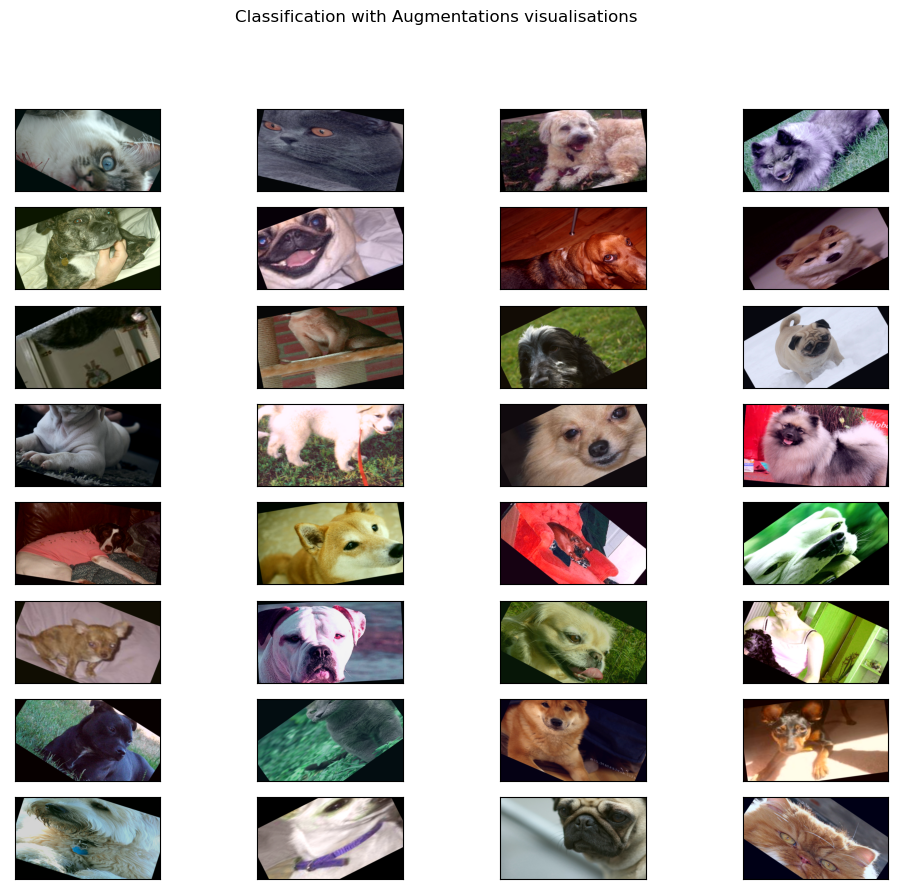

In [19]:
# Visualize image with augmentations- one mask
plt.figure(figsize = (12, 10))
for i in range(32):
    # x rows & y columns-
    plt.subplot(8, 4, i + 1)
    plt.imshow(x[i])
    
    # get current axes-
    ax = plt.gca()
    # hide x-axis-
    ax.get_xaxis().set_visible(False)
    # hide y-axis-
    ax.get_yaxis().set_visible(False)
    
plt.suptitle("Classification with Augmentations visualisations")
plt.show()

In [20]:
del x, y